## Disk UME Size measurement

This code is designed for characterizing the radius of a disk ultramicroelectrode (UME) based on cyclic voltammetry (CV). It automates data import, analysis, and visualization, providing key information about the UME size based on steady-state current measurementsm from CV.

In [14]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress
%matplotlib inline

Step 1:
set up your raw data filepath and the savepath for your figure

In [8]:
filepath = "/Users/ruixuan/Zhang Lab/test data/data"
savepath = "/Users/ruixuan/Zhang Lab/test data/figure"
savepath = savepath + "/"
fileList = os.listdir(filepath);
filtered_files = [file for file in fileList if not file.startswith('._')] #remove temp file created by MAC
fileList = filtered_files
num_list = len(fileList);

In [9]:
#check the file name
filtered_files

['PPE 05.txt', 'PPE 04.txt', 'PPE 01.txt', 'PPE 03.txt', 'PPE 02.txt']

Step 2: set up your redox solution information, including concentration, number of electron transferred, diffusion coefficient

In [10]:
#solution information
C = 1 # mM, concentration of FcMeOH
n = 1 #number of electron transfer
D = 7.8e-6 #FcMeOH
F = 96485.3329

We first plot and save the CV data in the folder for reference, then the baseline of the steady-state current measurment is located and fitted using a liner regression. The fitted line is further extrapolated to the steady-state area. The steady-state current is measured as the current diffenece between the baseline and the highest current in the steady-state current area. Fitted baseline and steady-state current are labeled on the CV plot.

Once the steady-state current (Iss) is obtained, the radius of disk UME is calculated based on the equation below:Iss = 4nFDCa, in which n is the number of electron transferren, F is Faraday constant, D is diffusion coefficient of redox molecule, C is the bulk concentration of redox solution, a is the radius of electrode.

Next, the radius and steady-state current are labeled on the CV plot. The plot including above information are then automatically saved in the designated folder, with the name as "raw file name+information.png".

test [ 41 100 118]
Iss =  0.7787598259757821 nA in 1 mM FcMeOH
r_ume = 2.5869476823411697 um
test [ 88 146 164]
Iss =  0.8548784103440576 nA in 1 mM FcMeOH
r_ume = 2.8398045823075595 um
test [36 65 73]
Iss =  0.8791726228463774 nA in 1 mM FcMeOH
r_ume = 2.9205070718696424 um
test [ 42 100 118]
Iss =  1.0907142942297914 nA in 1 mM FcMeOH
r_ume = 3.6232233885699827 um
test [ 0 61 91 99]
Iss =  0.9852425472625537 nA in 1 mM FcMeOH
r_ume = 3.2728587674526954 um


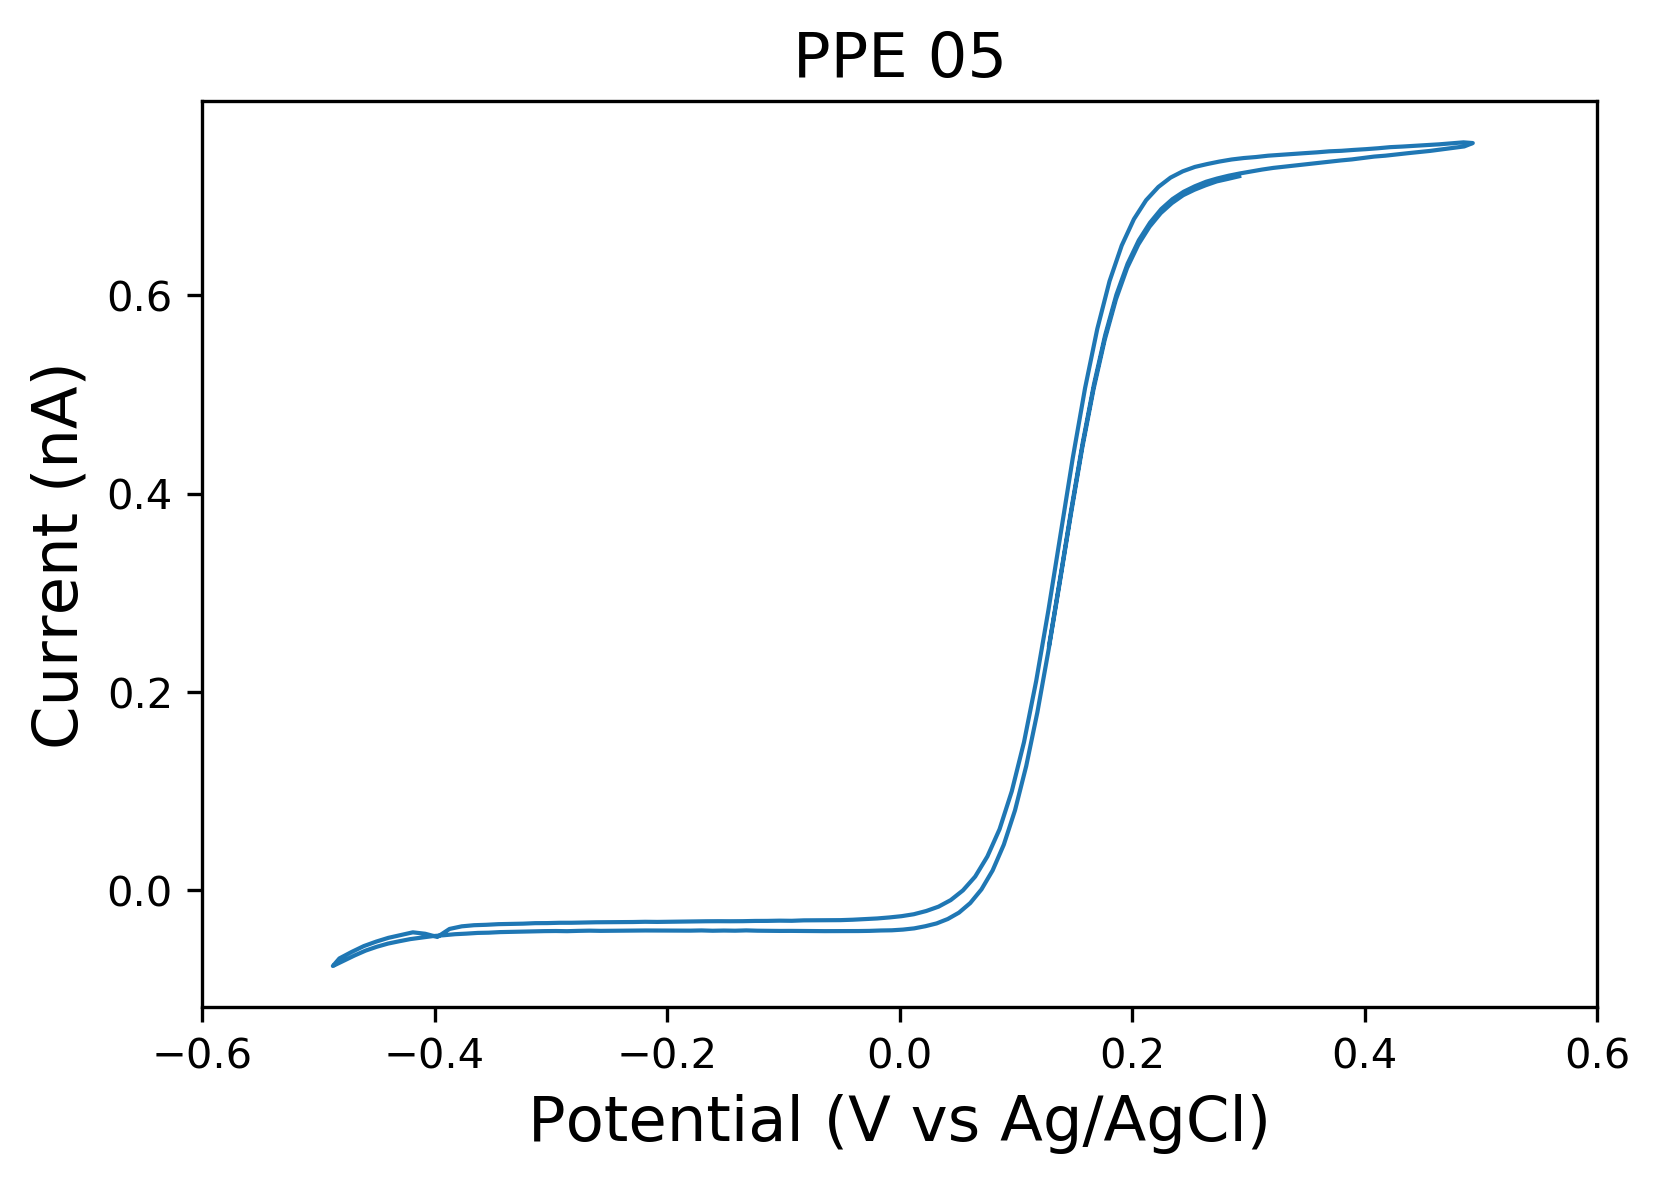

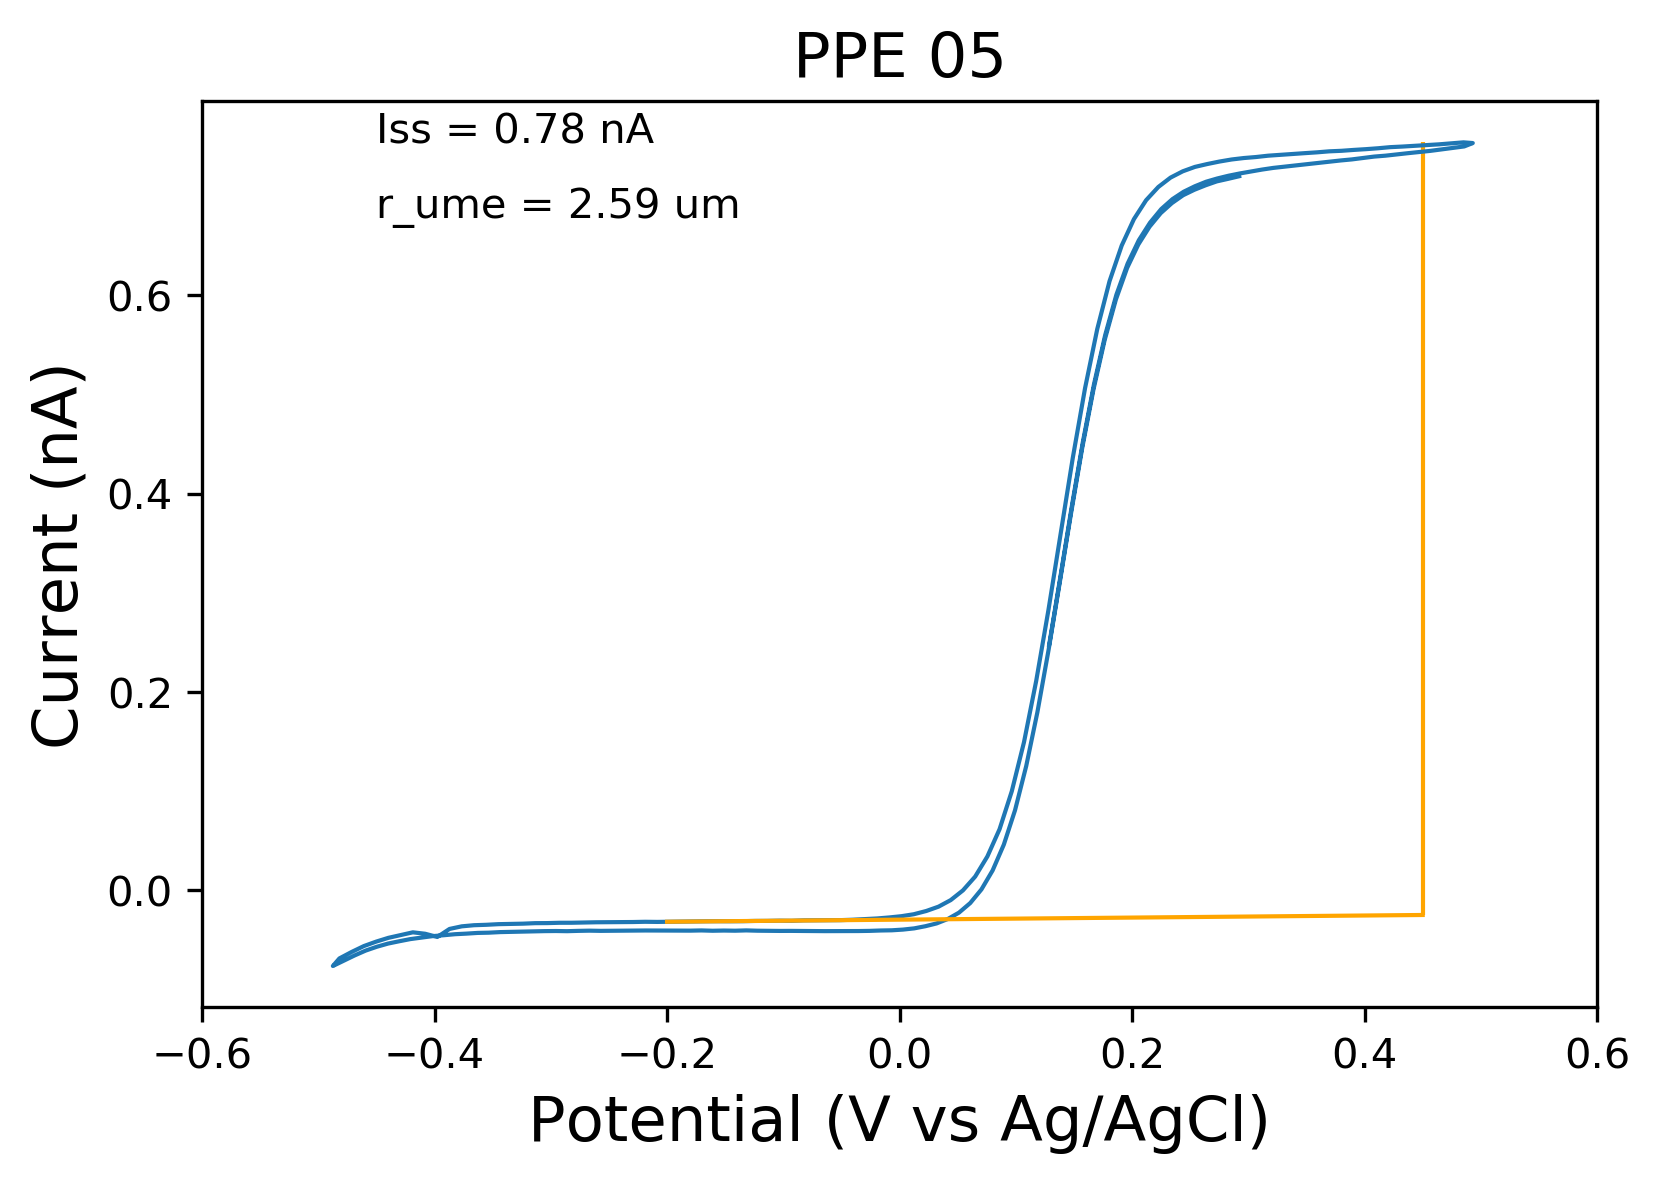

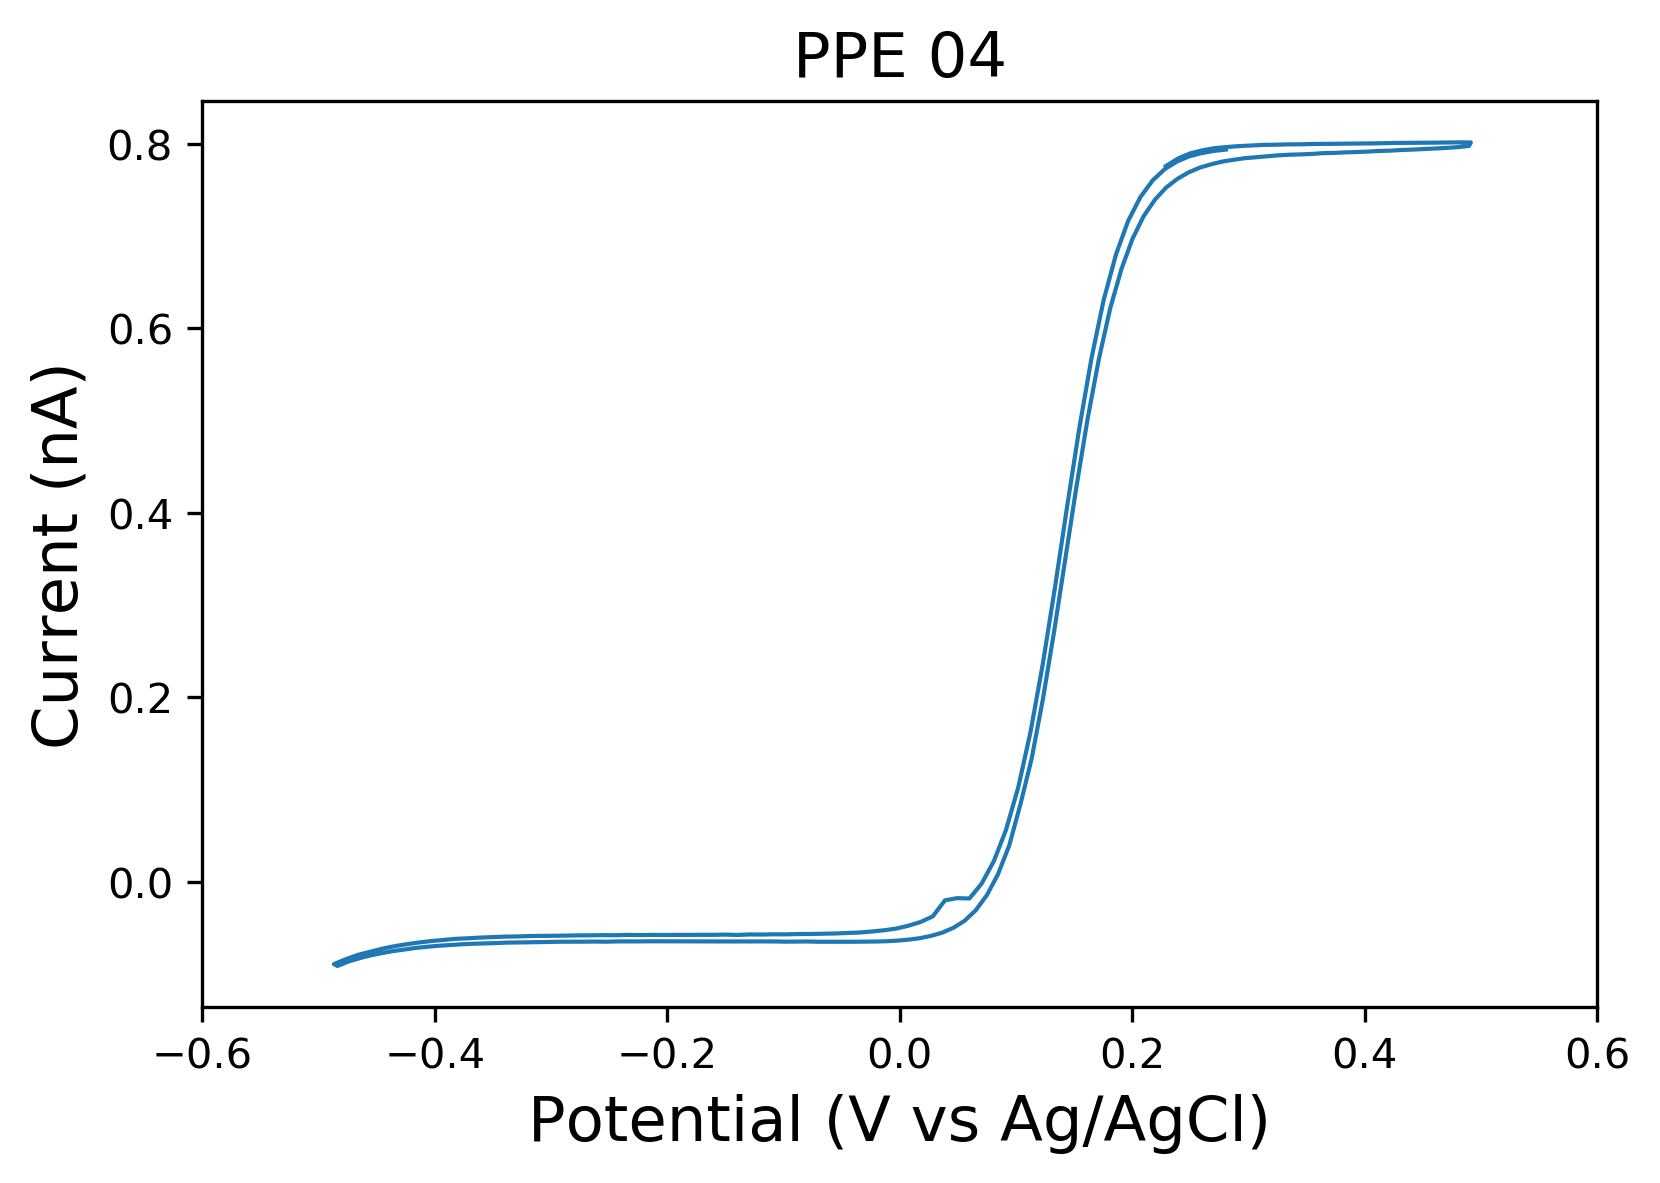

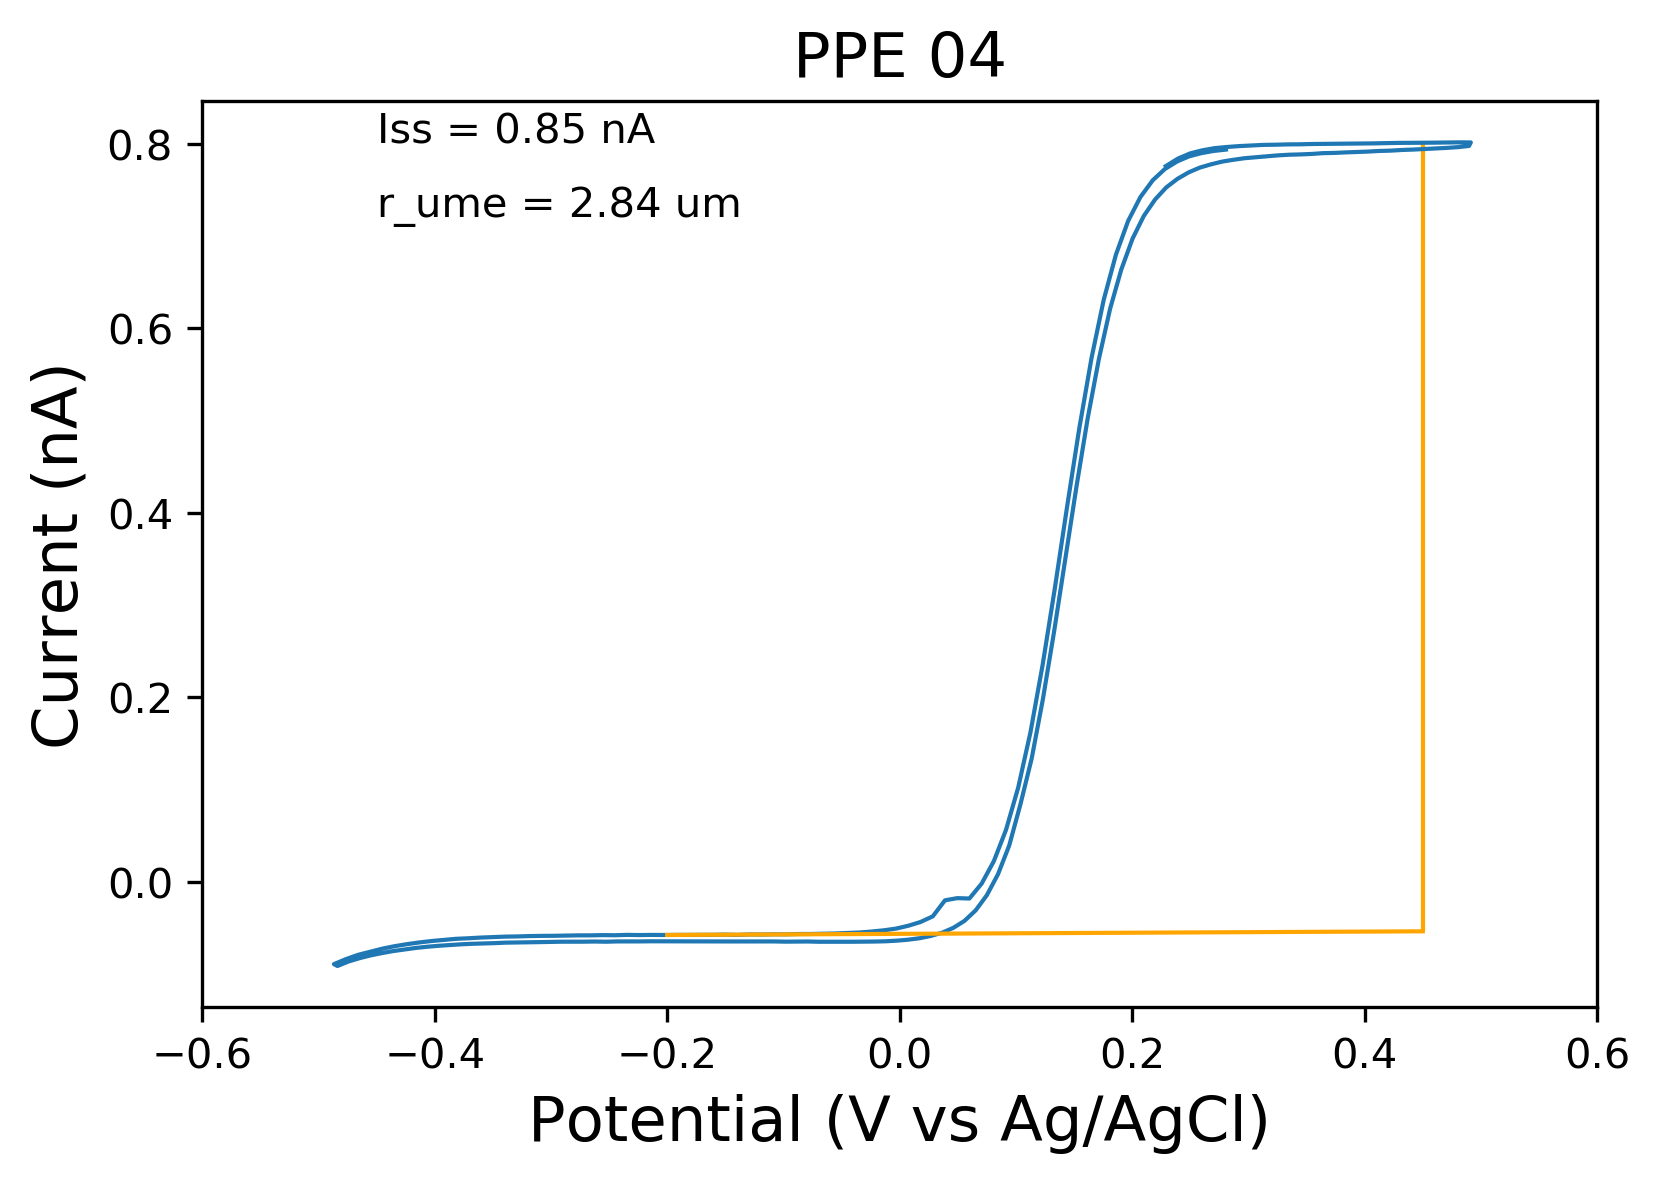

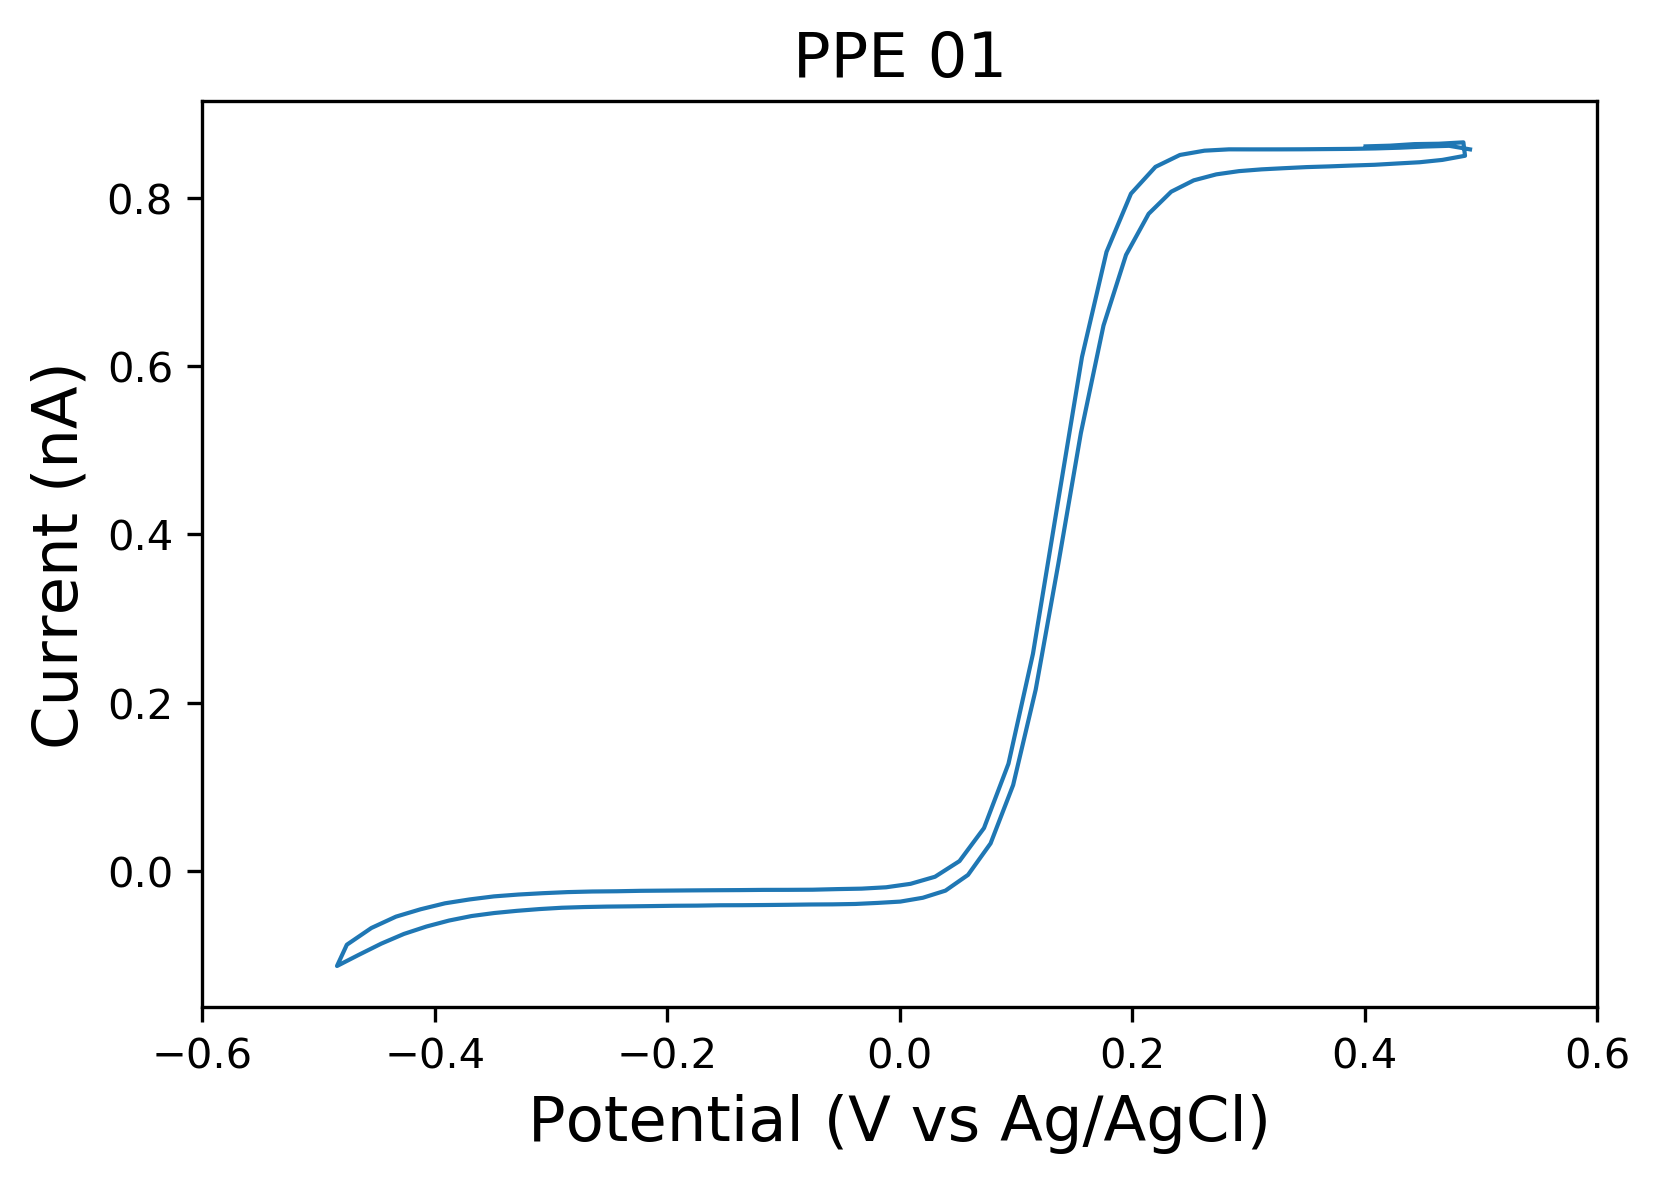

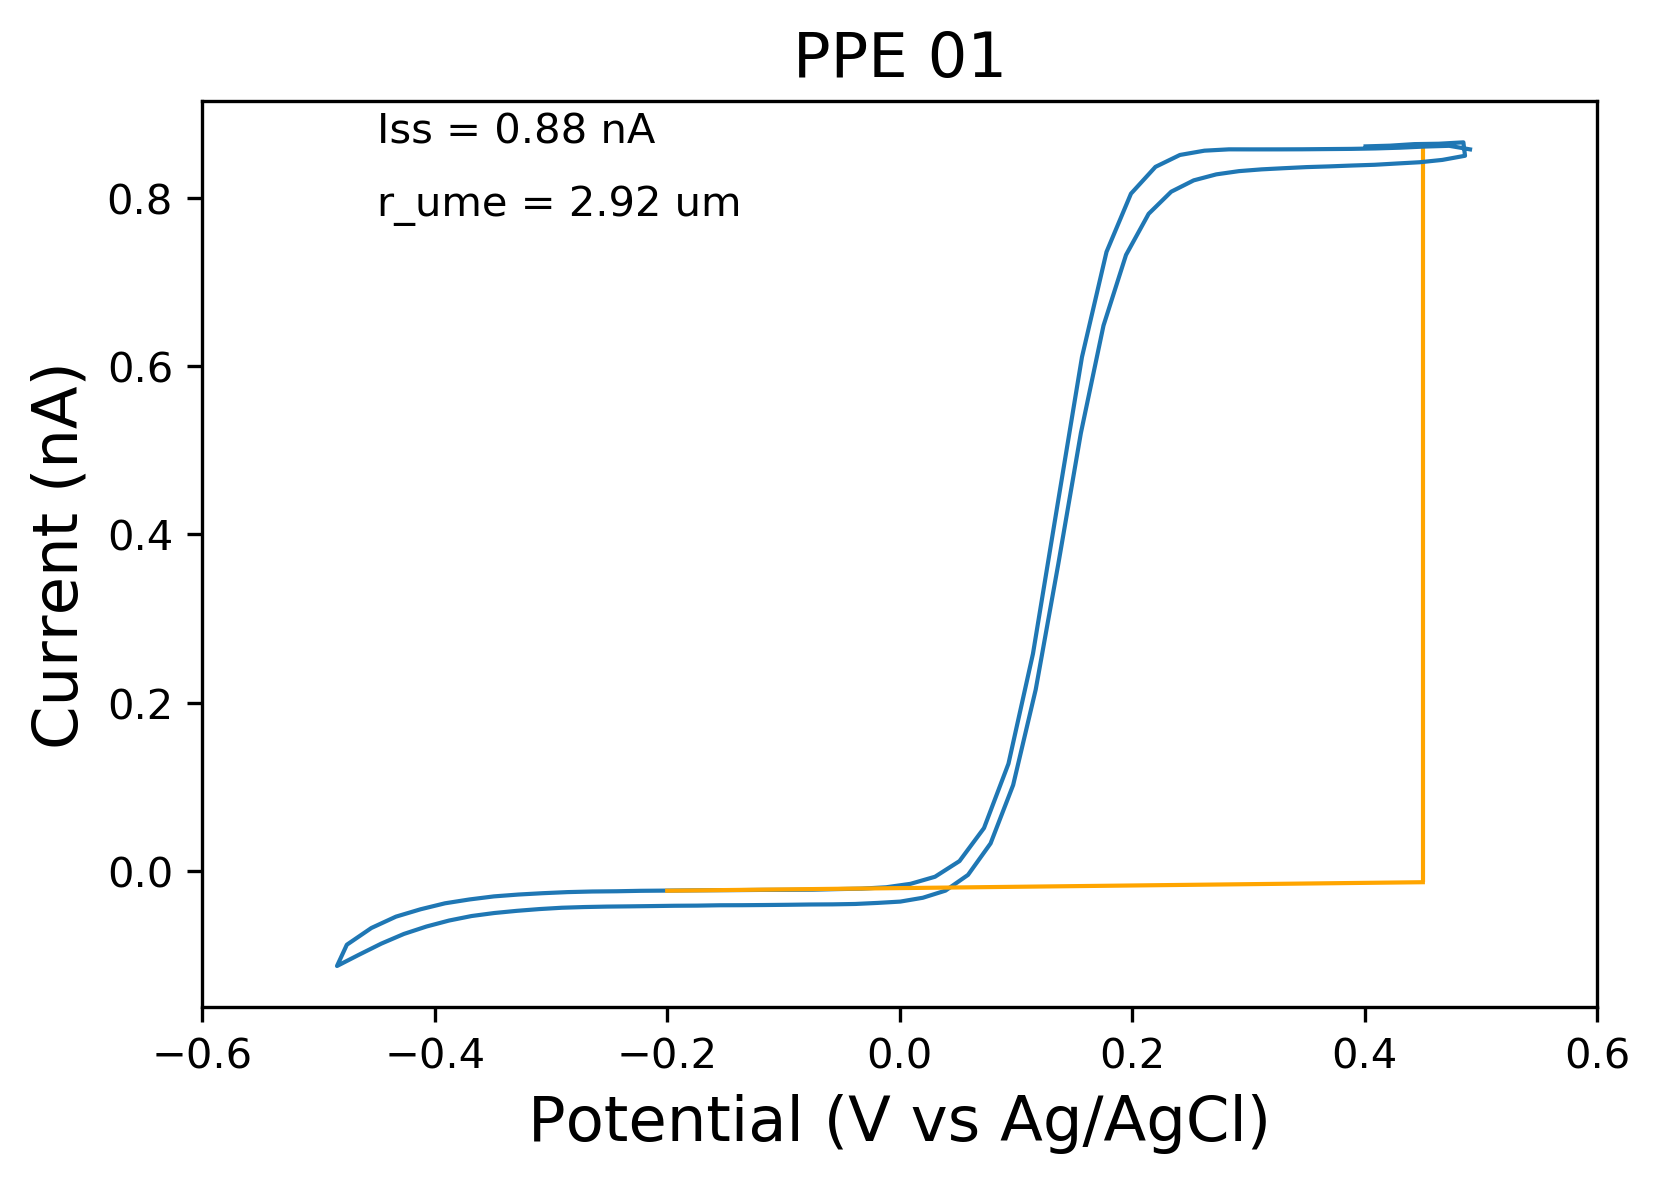

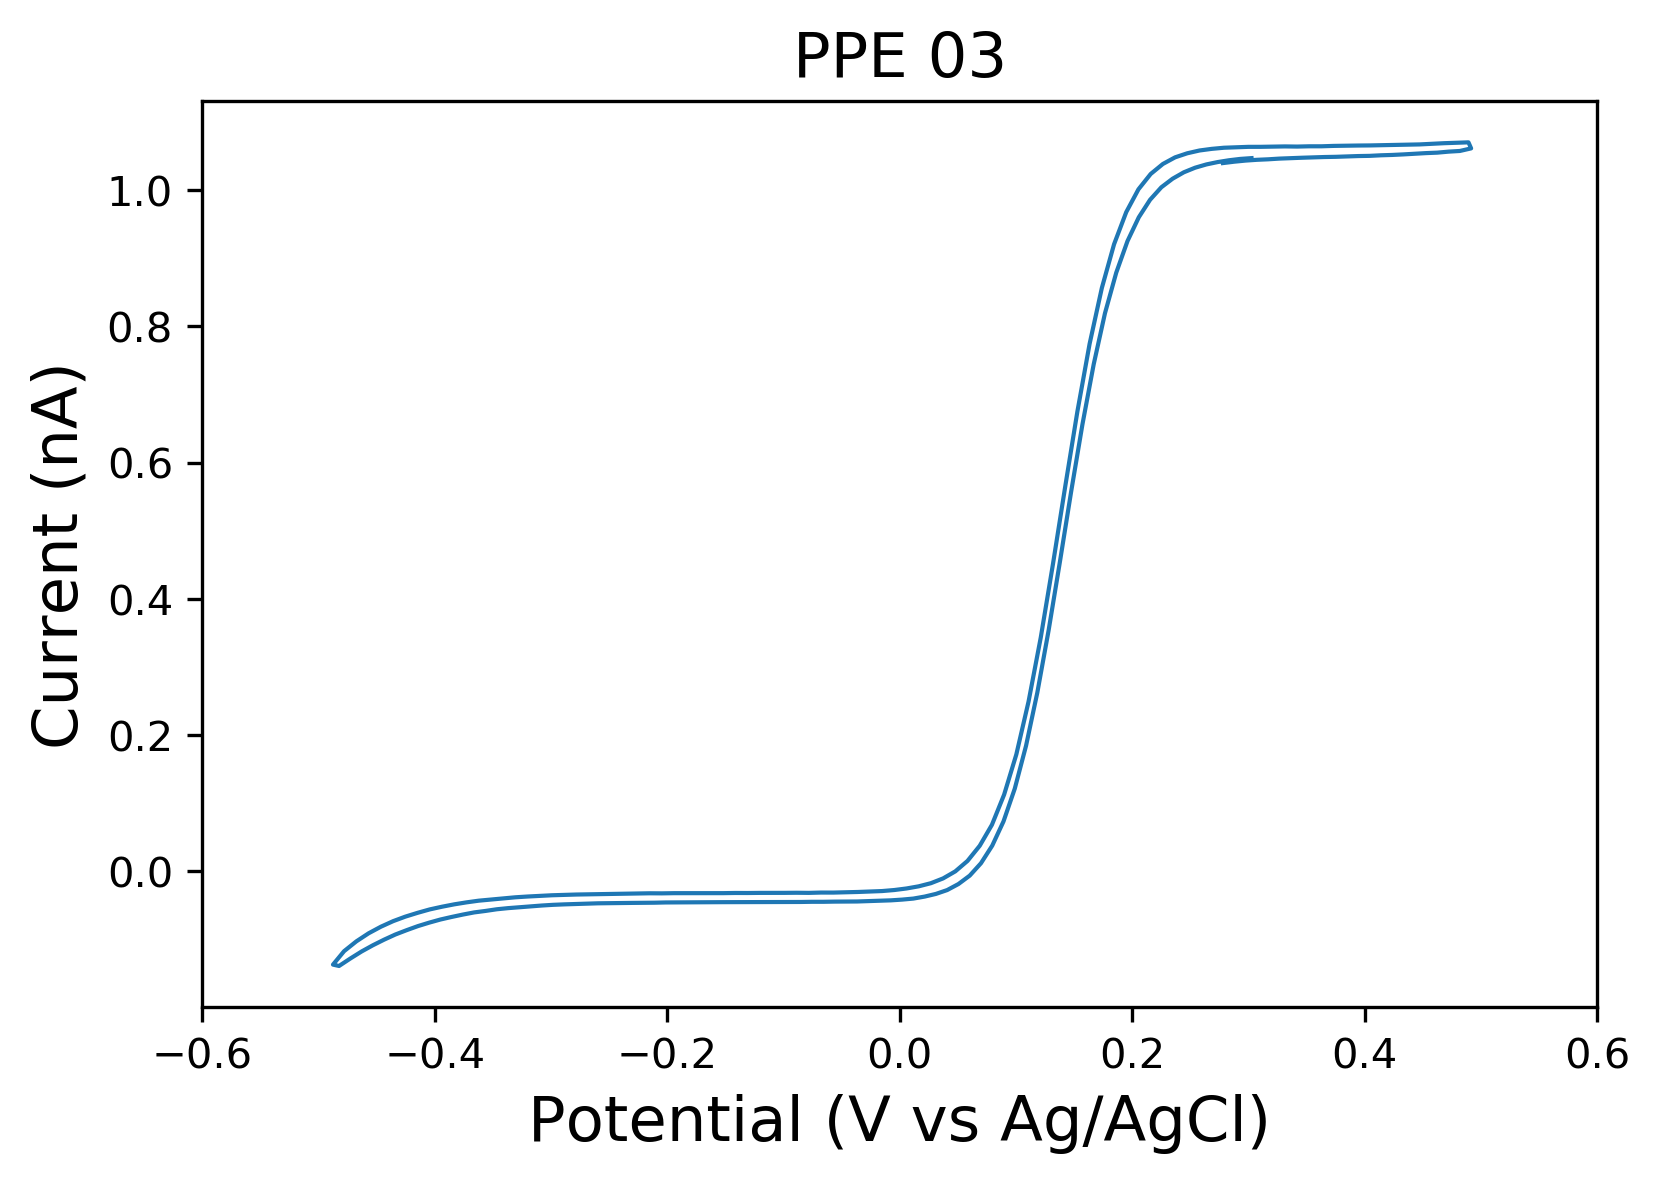

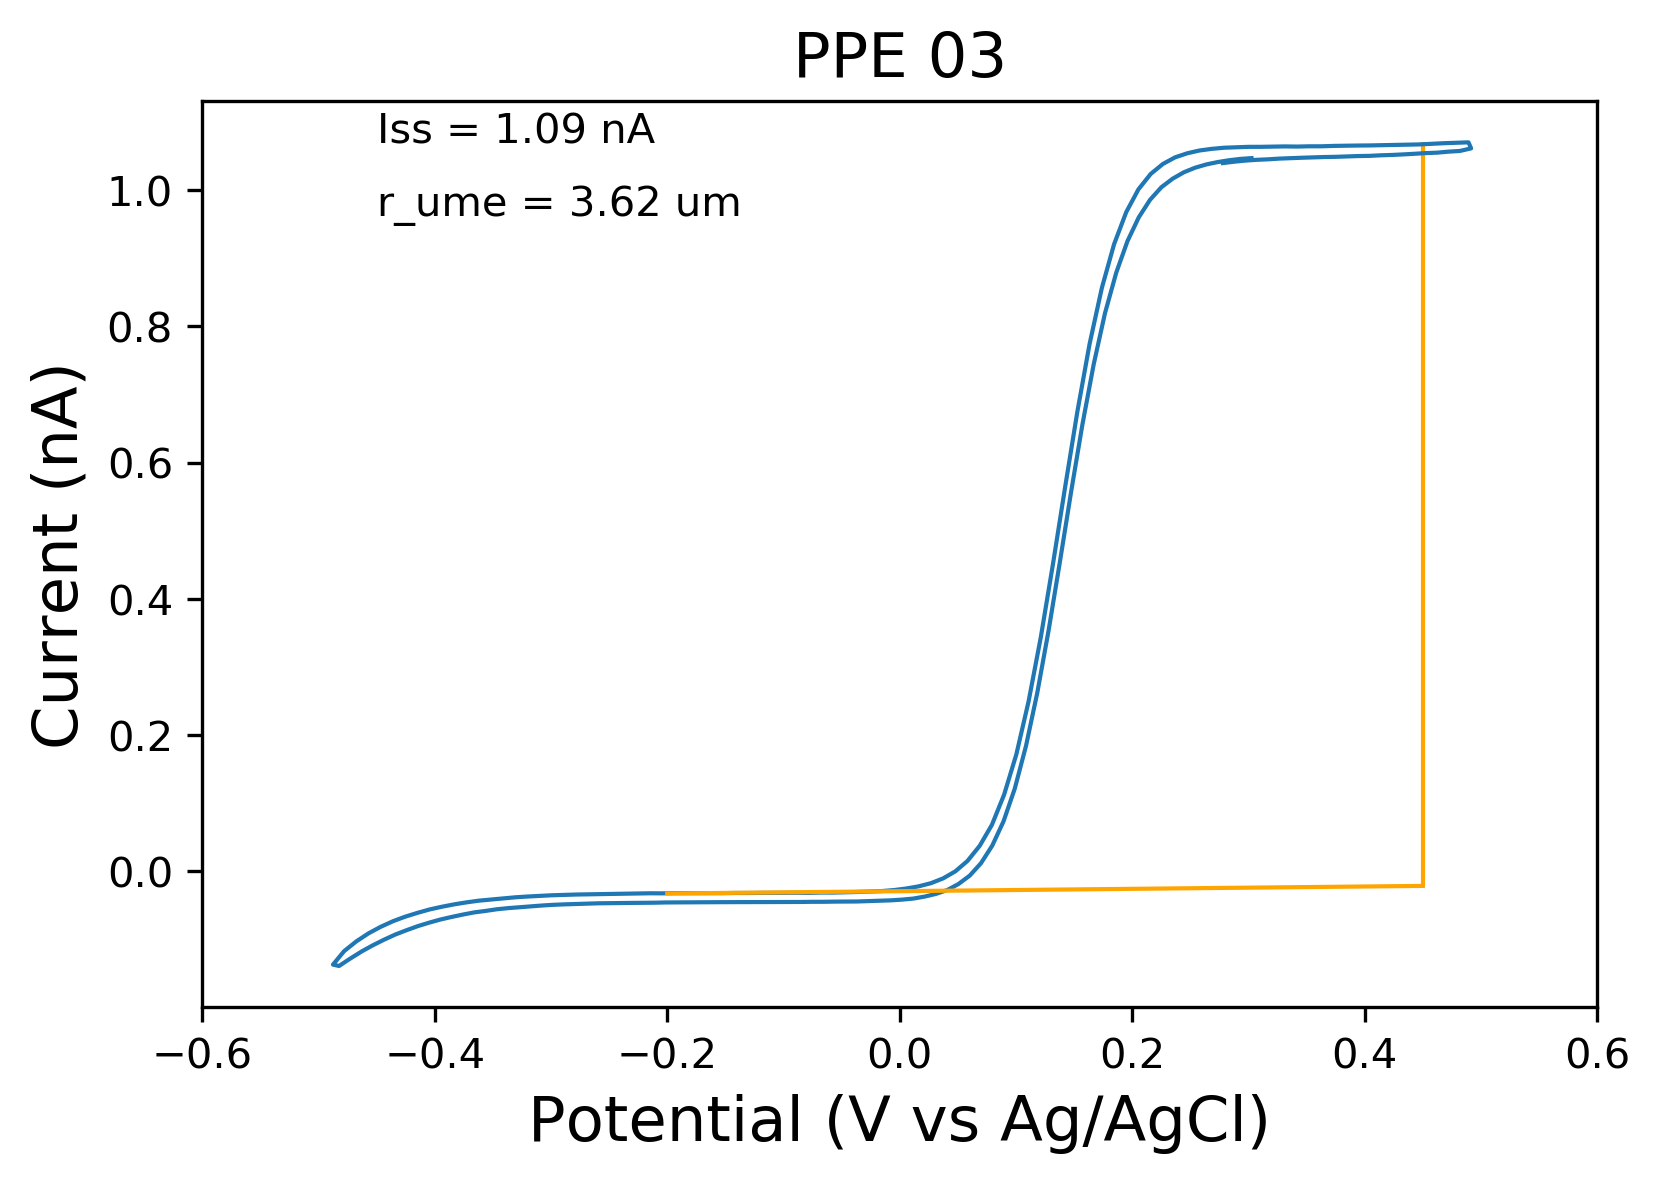

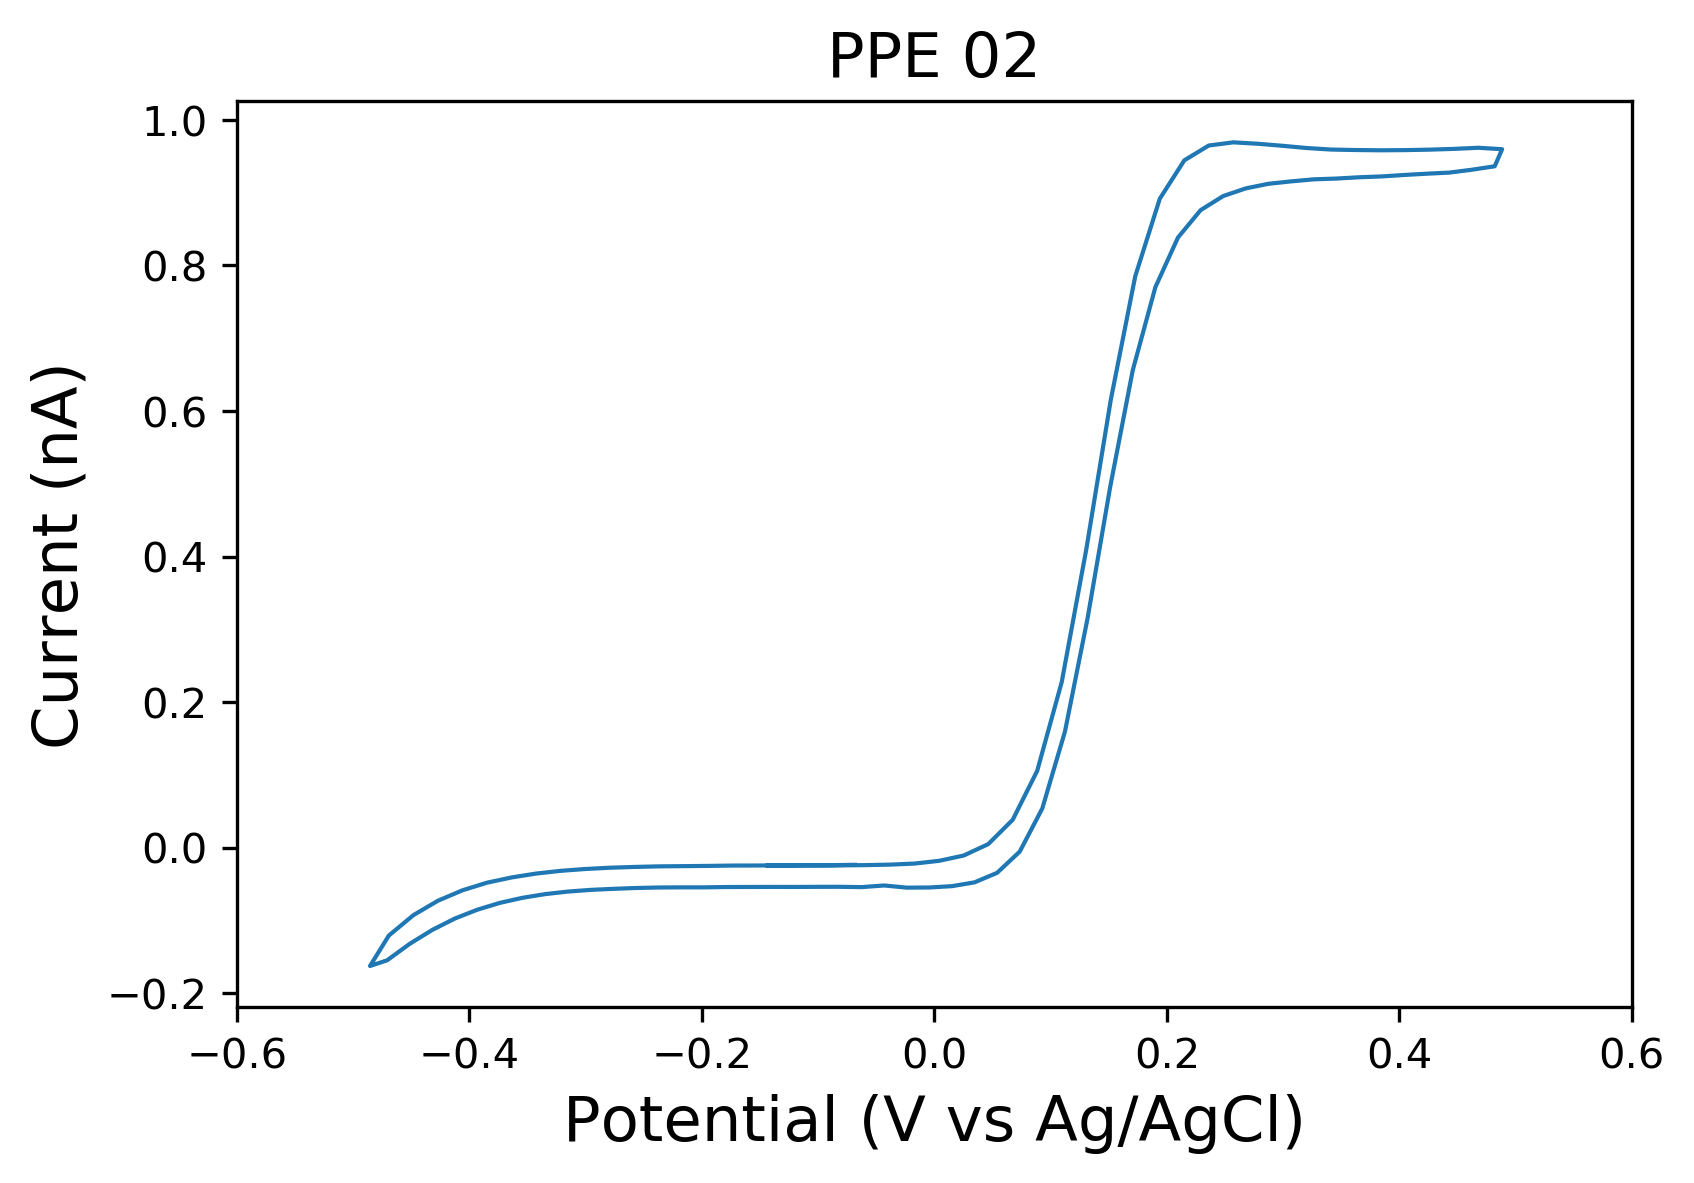

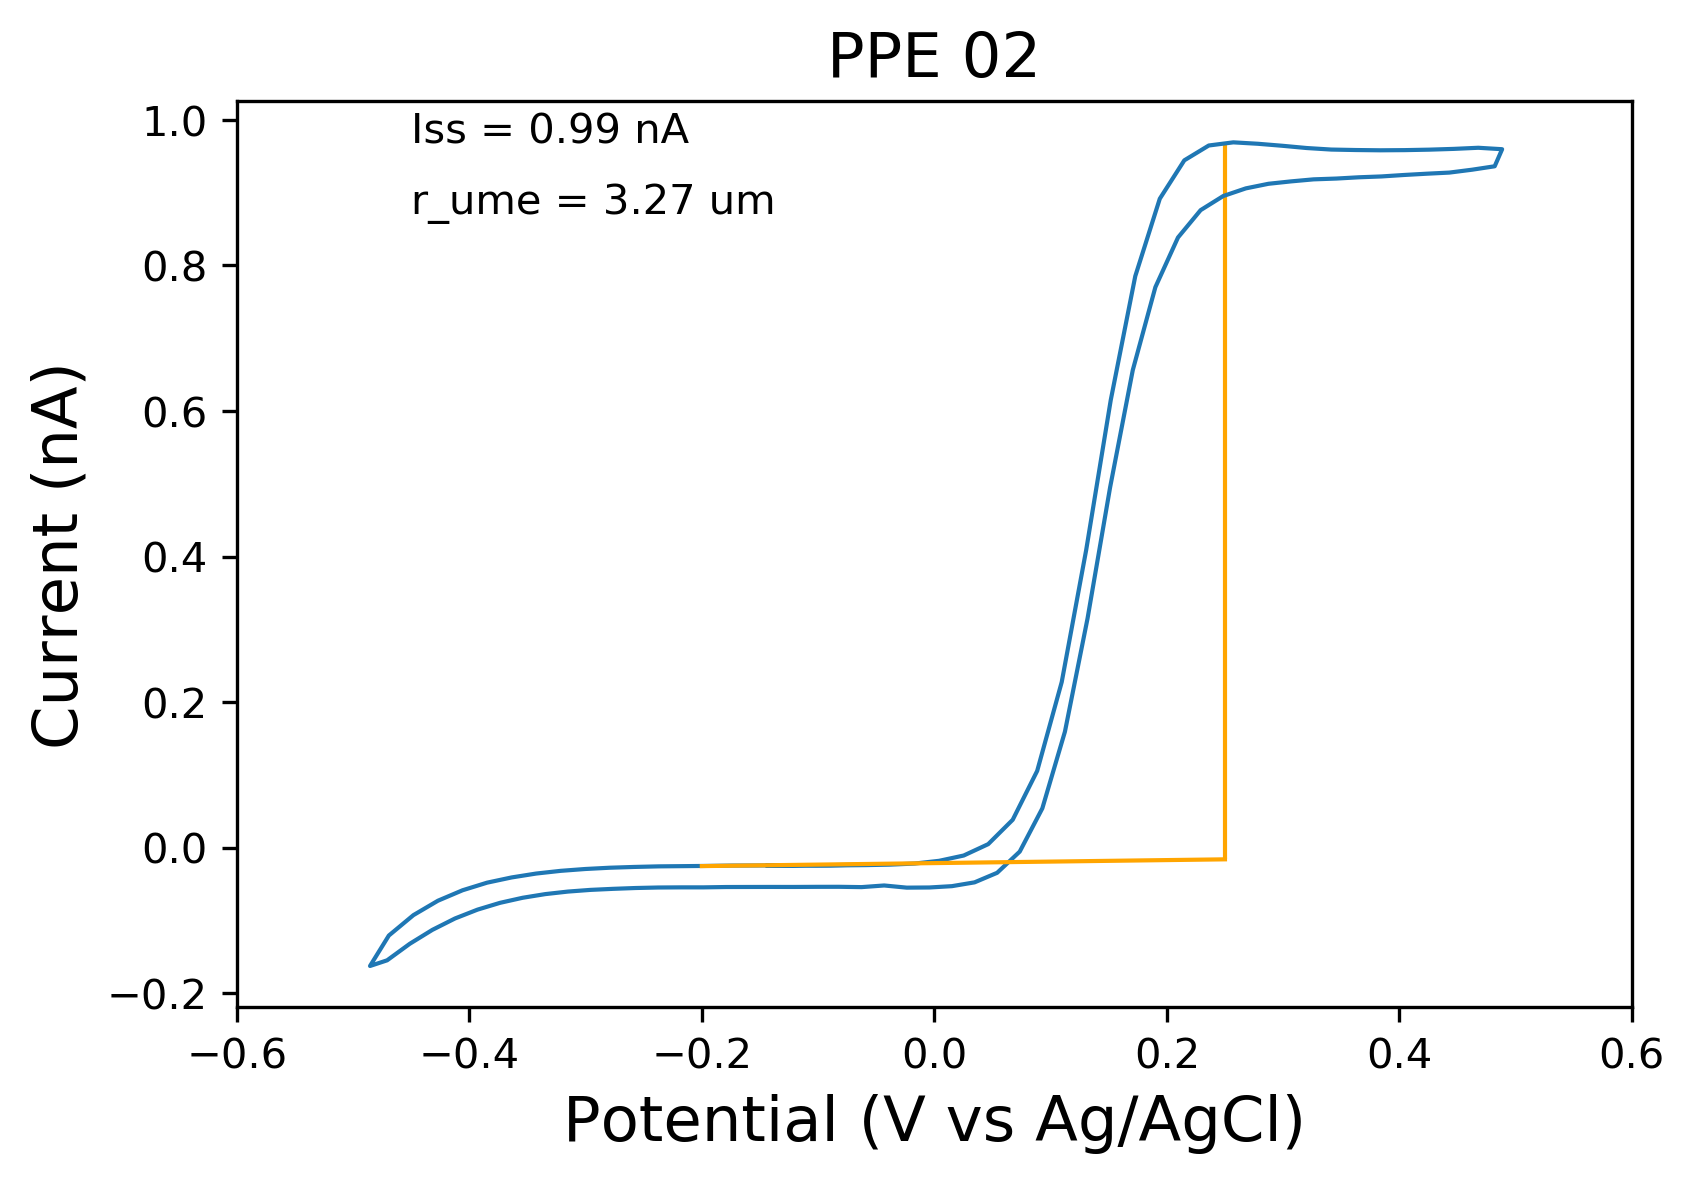

In [19]:
filename = filepath  + "/" + fileList[0]
CV = pd.read_csv(filename, header = None,sep = '\t');

k = 0
for j in range(num_list):
    filename = filepath  + "/" + fileList[j];
    #CV = pd.read_csv(filename, header = None,sep = '\t', names=['V', 'nA']);
    #CV = CV.drop(columns = "index");
    CV = pd.read_csv(filename, header = None,sep = '\t', names=['index', 'V', 'nA']);
    CV = CV.drop(columns = "index");

    plt.figure(k, dpi = 300);
    plt.plot(CV.V, CV.nA, linewidth = 1);
    plt.xlabel("Potential (V vs Ag/AgCl)", fontsize = 15);
    plt.ylabel("Current (nA)", fontsize = 15);
    plt.title(fileList[j].split('.t')[0], fontsize = 15);
    plt.xticks(np.arange(-0.6,0.8,0.2))
    #save plot
    filename_fig = savepath + fileList[j].split('.t')[0]+ ".png";
    plt.savefig(filename_fig, bbox_inches = 'tight');

    #locate baseline

    base = CV[(CV["V"]> -0.3) & (CV["V"]<-0.1)]
    index_list = base["V"].index.to_list()

    #trim data locate in specific range
    index_point = [np.min(index_list)]
    for i in np.arange(0, len(index_list)-1):
        if index_list[(i+1)] - index_list[i] > 1:
            index_point = np.append(index_point, index_list[i+1])
    index_point = np.append(index_point, np.max(index_list))
    print("test",index_point)

    for i in np.arange(0, len(index_point)-1):
        trim_base = base.loc[index_point[i]:index_point[i+1]-1]
        if trim_base.V[index_point[i]] - trim_base.V[index_point[i]+1] < 0:
            baseline = trim_base

    #linear fit
    slope, intercept, r_value, p_value, stderr = linregress(baseline.V, baseline.nA)

    # max current
    peak = CV.loc[CV.nA == np.max(CV.nA)]

    base_current = slope*peak.V+intercept
    Iss = float(peak.nA - base_current)
    r = Iss/1000000000/(4*n*F*D*(C*1e-6))*1e+4 #um

    print("Iss = ", Iss, "nA in", C, "mM FcMeOH")
    print("r_ume =",r, "um")

    x = np.arange(-0.2, float(peak.V),0.05)
    y = slope*x+intercept
    plt.figure(k+1, dpi = 300);
    plt.plot(CV.V, CV.nA, linewidth = 1);
    plt.plot(x,y, linewidth = 1, color="orange")
    plt.vlines(np.max(x), ymin = y[-1], ymax = float(peak.nA), linewidth = 1, colors="orange")

    text1 = "Iss = "+ str(round(Iss,2)) + " nA"
    text2 = "r_ume = " + str(round(r,2)) +" um"
    plt.text(-0.45, peak.nA, text1)
    plt.text(-0.45, peak.nA-peak.nA*0.1, text2)
    plt.xticks(np.arange(-0.6,0.8,0.2))
    plt.xlabel("Potential (V vs Ag/AgCl)", fontsize = 15);
    plt.ylabel("Current (nA)", fontsize = 15);
    plt.title(fileList[j].split('.t')[0], fontsize = 15);
    #save plot
    filename_fig = savepath + fileList[j].split('.t')[0]+ "information.png";
    plt.savefig(filename_fig, bbox_inches = 'tight');
    k = k + 2

Information below can be used to predict steady-state current with known UME size

In [13]:
#Prediction of Iss
r_ume = 5/2
Ilim = 4*n*F*D*(C*(10**(-6)))*(r_ume*10**(-4))*1000000000000 #pA
print("The diffusion limited current at a (disc) UME")
print("Iss =",Ilim, "pA;", Ilim/1000, "nA")

The diffusion limited current at a (disc) UME
Iss = 752.5855966199999 pA; 0.7525855966199999 nA
